# ***RECURRENT NEURAL NETWORKS***

> **Recurrent Neural Networks are a special type of neural network designed to process sequential data, such as sentences or time series. Unlike standard neural networks, RNNs have connections that loop back, allowing them to maintain a form of "memory" and keep track of information from previous data points in the sequence.**

> ***RNNs use something called Recurrent Neurons...***
### **1. RECURRENT NEURONS**
* The recurrent neuron differs from standard neuron. The recurrent neuron also has a hidden state. It stores the data/context from the previous sequences in it.
* Suppose at a certain time step, the recurrent neuron recieves some input. What it does is
  * Like a normal neuron, it also does some operation on the data to pass it further.
  * But it also takes in the hidden state of last Recurrent Neuron, combines with the current data/info, does some work to store the sequential context till that time step.
  * The RNN updates this hidden state using both the current input and the previous hidden state to create a new hidden state
  that reflects the accumulated knowledge of the input sequence so far.
* This is also called `feedback loops`. The output of one neuron at one time step is contextual/sequential input for the other neuron on successive time steps.
* ***In terms of sentiment analysis, this enables the RNN to remember the previous words, meaning of the sentences till that word and what the correct word provides as data.***

### **2. FORWARD PROPOGATION IN RNNs**
* Because in rnn, there is `input layers + hidden layer of Recurrent Neurons + output layer`, what happens is the mechanism is quiet different from the Feedforward Neural Networks.
* At each hidden layer, suppose we are at the recurrent neuron. It takes in data from the previous neuron and also the hidden state of the previous one.
* Then it applies the tanh activation or some other on it. Now the data is ready to go into the next one and also the current hidden state is based on current info + prev info.
* And hence we get to the output

### **3. BACKPROPOGATION IN RNNs**
* RNNs process sequences step-by-step, maintaining a hidden state that depends on the current input and the previous hidden state.
* During training, the parameters (weights) of the RNN need to be updated based on how the network performed over the entire sequence, not just at the final step.
* Because the hidden state at each time step depends on previous states, the error at a given step can be influenced by all earlier time steps.
* BPTT "unfolds" the RNN through time into a long feedforward-like network where each time step is like a layer.
* Then, standard backpropagation is applied through this unfolded network, propagating error backward through each time step.
* The weight gradients from each time step are summed together because the same weights are shared across time.


> `A GOOD INTUTION FOR WHY RNNs?`  - ***To better demonstrate the distinction between FFNs and RNNs, imagine we want to label words as the part-of-speech categories that they belong to: E.g. for the input sentence “I would like the duck” and “He had to duck”. Our model should predict that duck is a Noun in the first sentence and a Verb in the second. To do this successfully, the model needs to be aware of the surrounding context. However, if we feed a FFN model only one word at a time, how could it know the difference? If we want to feed it all the words at once, how do we deal with the fact that sentences are of different lengths?***

## **PROBLEM STATEMENT - SPAM vs HAM**
**ABOUT**
> *Our Problem statement to learn Recurrent Neural Networks is going to be SPAM vs HAM classifier. The basic HELLO WORLD of NLP and RNNs*

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
## LOADING THE DATASET
data = pd.read_csv("spamhamdata.csv", sep="\t", header=None, names=['label', 'text'])
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
## Let's visualize (just seeing as this is textual) some samples
def getSamples(type = "spam", N = 5):
  if type not in ["spam", "ham"]:
    print("EITHER ENTER spam OR ham")
    return
  typeData = data[data["label"] == type]
  random_samples = typeData.sample(n=N)
  sentences = list(random_samples["text"])
  print("-----------------------------------")
  print(" ")
  print(f"{type.upper()}")
  print(" ")
  print("-----------------------------------")
  for index, sentence in enumerate(sentences):
    print(f"SENTENCE - {index + 1} : ")
    print(sentence)
    print("-------------------------------------")

In [36]:
getSamples()

-----------------------------------
 
SPAM
 
-----------------------------------
SENTENCE - 1 : 
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
-------------------------------------
SENTENCE - 2 : 
A link to your picture has been sent. You can also use http://alto18.co.uk/wave/wave.asp?o=44345
-------------------------------------
SENTENCE - 3 : 
Congratulations ur awarded either £500 of CD gift vouchers & Free entry 2 our £100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
-------------------------------------
SENTENCE - 4 : 
You have 1 new message. Please call 08712400200.
-------------------------------------
SENTENCE - 5 : 
URGENT! We are trying to contact U. Todays draw shows that you have won a £2000 prize GUARANTEED. Call 09066358361 from land line. Claim Y87. Valid 12hrs only
-------------------------------------


In [37]:
getSamples("ham")

-----------------------------------
 
HAM
 
-----------------------------------
SENTENCE - 1 : 
You getting back any time soon?
-------------------------------------
SENTENCE - 2 : 
Oh great. I.ll disturb him more so that we can talk.
-------------------------------------
SENTENCE - 3 : 
Yeah. I got a list with only u and Joanna if I'm feeling really anti social
-------------------------------------
SENTENCE - 4 : 
Dear relieved of westonzoyland, all going to plan this end too!
-------------------------------------
SENTENCE - 5 : 
WOT U WANNA DO THEN MISSY?
-------------------------------------


SO OUR DATA IS GOOD...LET'S START THE DATA TRANSFORMATION



## **1. TEXT PREPROCESSING**
1. LOWERCASE THE SENTENCE
2. REMOVE THE PUNCTUATION
3. REMOVE THE STOPWORDS

In [38]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))


def preprocess(sentence):
  # 1. lowercase
  sentence = sentence.lower()

  # 2. tokenize and remove the punctuation
  tokens = word_tokenize(sentence)
  sentence = word_tokenize(sentence)
  sentence_tokens = [re.sub(r'[^\w\s]', '', token) for token in sentence if re.sub(r'[^\w\s]', '', token)]

  # 3. remove the stopwords
  filtered_sentence_tokens = [word for word in sentence_tokens if word not in stop_words]
  return filtered_sentence_tokens

In [40]:
data["text"] = data["text"].apply(preprocess)
data.head()

,label,text
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, nt, think, goes, usf, lives, around, tho..."


1. INTEGER ENCODING
2. PADDING / TRUNCATING WITH SAME SIZES
3. MAKING DENSE EMBEDDINGS

In [43]:
## INTEGER ENCODING

vocab = {}
for sample in data["text"]:
  for word in sample:
    if word not in vocab:
      vocab[word] = len(vocab) + 2

vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

# Encode
encoded_sentence = [
    [vocab.get(word, vocab["<UNK>"]) for word in sentence]
    for sentence in data["text"]
]
encoded_sentence[:3]

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [18, 19, 20, 21, 22, 23],
 [24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  30,
  38,
  39,
  25,
  40,
  41,
  42,
  43,
  44,
  45,
  46]]

In [50]:
## PADDING
max_len = max(len(s) for s in encoded_sentence)

def makeSameSize(sample, max_len=max_len):
    if len(sample) < max_len:
        sample = sample + [0] * (max_len - len(sample))  # padding
    else:
        sample = sample[:max_len]  # truncating
    return sample

In [53]:
encoded_sentences = [makeSameSize(sample) for sample in encoded_sentence]

`embedded layers`
* An embedding layer is a special kind of lookup table that maps discrete tokens (like words, represented as integers) to dense vectors of fixed size.
Instead of feeding raw integer IDs to your model, you convert them into continuous vector representations that capture semantic meaning.
* Instead of representing each word as a sparse one-hot vector like [0,1,0,0] for "dog", you have a dense vector capturing features/relationships.
* These embeddings are learned during training, so the model finds numeric vectors that help it understand word meaning, similarity, etc.
* Words with similiar context like CAT, DOG etc...end up having similiar meanings so that the model can generalize

> 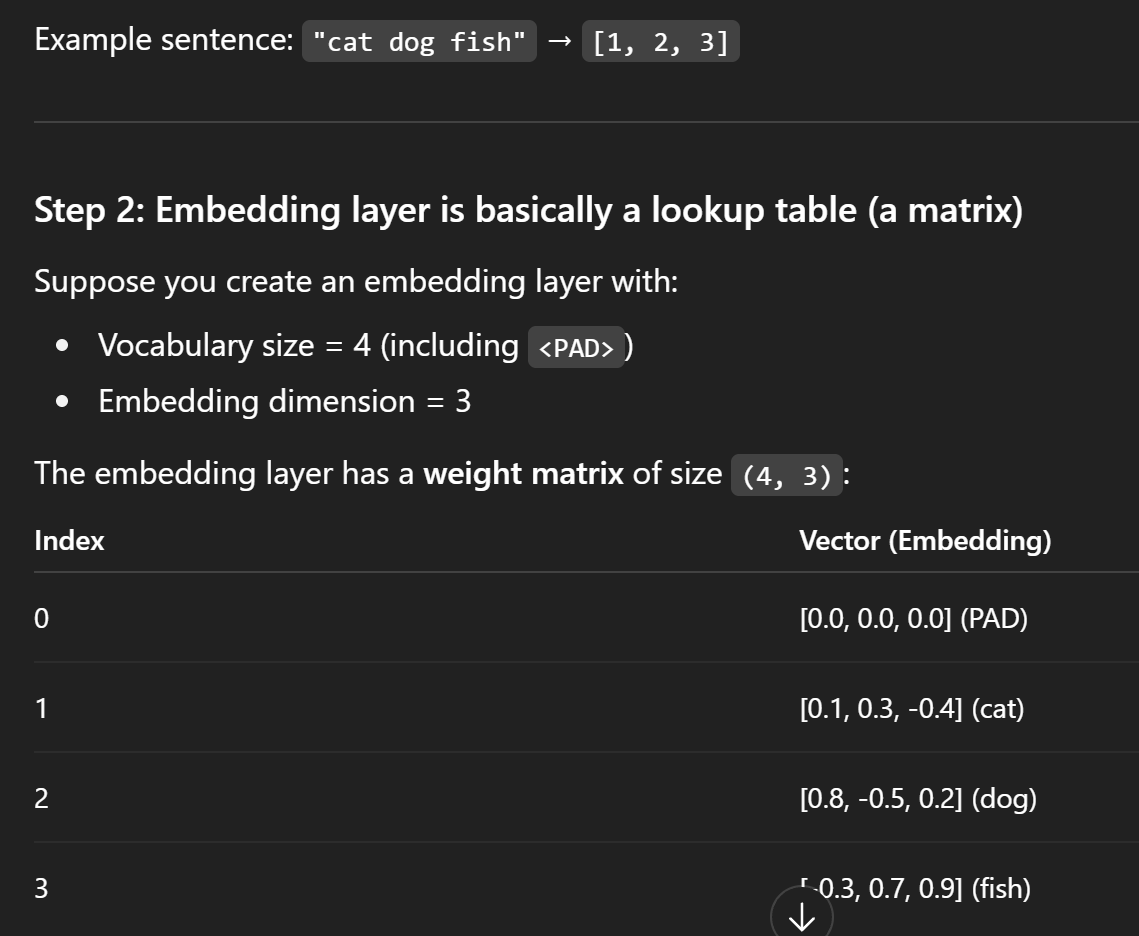


In [57]:
import torch

embedding_dim = 64
vocab_size = len(vocab)  # your vocab dict size
max_seq_length = 80

encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.long)
embedding = torch.nn.Embedding(vocab_size, embedding_dim)
embedded_output = embedding(encoded_sentences)
print(embedded_output.shape)

torch.Size([5572, 80, 64])


/tmp/ipython-input-3690082532.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.long)


In [59]:
embedded_output[:2]

tensor([[[ 1.4722, -0.7266, -0.1344,  ..., -1.8562,  1.2703,  0.7231],
         [ 1.8748, -0.2913, -0.4369,  ..., -0.7173, -2.2793,  1.0871],
         [-0.4005, -0.9385, -2.2987,  ..., -0.0789, -0.1063, -0.3092],
         ...,
         [ 0.4654,  0.0986, -1.0384,  ..., -0.3417,  0.3620,  0.4672],
         [ 0.4654,  0.0986, -1.0384,  ..., -0.3417,  0.3620,  0.4672],
         [ 0.4654,  0.0986, -1.0384,  ..., -0.3417,  0.3620,  0.4672]],

        [[-0.4959,  1.6843, -0.8733,  ..., -0.9610,  0.2662,  0.0224],
         [-0.0184,  0.3878, -0.6423,  ..., -3.2998, -0.2421,  0.4463],
         [-0.6705, -0.1776, -1.0715,  ...,  0.9490, -0.3057,  0.1203],
         ...,
         [ 0.4654,  0.0986, -1.0384,  ..., -0.3417,  0.3620,  0.4672],
         [ 0.4654,  0.0986, -1.0384,  ..., -0.3417,  0.3620,  0.4672],
         [ 0.4654,  0.0986, -1.0384,  ..., -0.3417,  0.3620,  0.4672]]],
       grad_fn=<SliceBackward0>)

In [60]:
len(embedded_output), len(data["label"])

(5572, 5572)

`LABELS`
Now let's convert the labels into numeric

In [61]:
labels = data["label"].map({
    "spam":0,
    "ham":1
})
labels = torch.tensor(labels, dtype=torch.int)
labels

tensor([1, 1, 0,  ..., 1, 1, 1], dtype=torch.int32)

In [62]:
print(type(embedded_output))
print(type(labels))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [63]:
X = embedded_output
y = labels